In [ ]:
import pandas as pd
import glob
import time
import pandas as pd



import os
import matplotlib.pyplot as plt
import keras

import cv2

In [ ]:
df=pd.read_csv('XSS_dataset.csv', encoding='utf-8-sig')


In [ ]:
df.head()


,Unnamed: 0,Sentence,Label
0,0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,2,"\t </span> <span class=""reference-text"">Steeri...",0
3,3,"\t </span> <span class=""reference-text""><cite ...",0
4,4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


In [ ]:
df=df[df.columns[-2:]]

In [ ]:
df.head()

,Sentence,Label
0,"<li><a href=""/wiki/File:Socrates.png"" class=""i...",0
1,"<tt onmouseover=""alert(1)"">test</tt>",1
2,"\t </span> <span class=""reference-text"">Steeri...",0
3,"\t </span> <span class=""reference-text""><cite ...",0
4,"\t </span>. <a href=""/wiki/Digital_object_iden...",0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f974cce06a0>]],
      dtype=object)

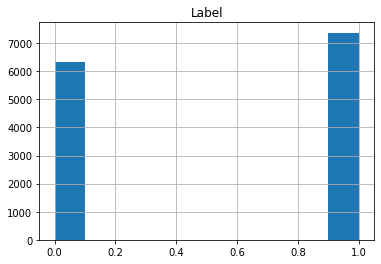

In [ ]:
df.hist()

In [ ]:
sentences=df['Sentence'].values

In [ ]:
sentences[1]

'<tt onmouseover="alert(1)">test</tt>'

In [ ]:
print(len(sentences))

13686


In [ ]:


def convert_to_ascii(sentence):
    sentence_ascii=[]

    for i in sentence:
        
        
       
        if(ord(i)<8222):      # ” has ASCII of 8221
            
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(134)
            
            
            if(ord(i)==8221): # ”  :  8221
                sentence_ascii.append(129)

            if(ord(i)==8220): # “  :  8220
                sentence_ascii.append(130)
                
                
            if(ord(i)==8216): # ‘  :  8216
                sentence_ascii.append(131)
                
            if(ord(i)==8217): # ’  :  8217
                sentence_ascii.append(132)
            
            if(ord(i)==8211): # –  :  8211
                sentence_ascii.append(133)
                
                
          
            if (ord(i)<=128):
                    sentence_ascii.append(ord(i))
    
            else:
                    pass
    zer=np.zeros((10000))

    for i in range(len(sentence_ascii)):
        zer[i]=sentence_ascii[i]

    zer.shape=(100, 100)


#     plt.plot(image)
#     plt.show()
    return zer

In [ ]:


import numpy as np
arr=np.zeros((len(sentences),100,100))

for i in range(len(sentences)):
    
    image=convert_to_ascii(sentences[i])

    x=np.asarray(image,dtype='float')
    image =  cv2.resize(x, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    image/=128
   
    arr[i]=image

In [ ]:
print("Input data shape : ", arr.shape)

Input data shape :  (13686, 100, 100)


In [ ]:
data = arr.reshape(arr.shape[0], 100, 100, 1)

In [ ]:
data.shape

(13686, 100, 100, 1)

In [ ]:
y=df['Label'].values

In [ ]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split(data,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv2D, MaxPooling2D,Flatten,Dropout,MaxPool2D

In [ ]:
model=tf.keras.models.Sequential([
    
    tf.keras.layers.Conv2D(64,(3,3), activation=tf.nn.relu, input_shape=(100,100,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(256,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
    
])

In [ ]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 47, 47, 128)       73856     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 21, 21, 256)       295168    
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 10, 10, 256)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 25600)            

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.97):
            print(" \n Reached 97% + validation accuracy")
            self.model.stop_training=True
callbacks = myCallback()

In [ ]:
batch_size = 128
num_epoch = 10
#model training
model_log = model.fit(trainX, trainY,
          batch_size=batch_size,
          epochs=num_epoch,
          verbose=1,
          validation_data=( testX,  testY)
#                        callbacks=[callbacks]
                     )

Epoch 1/10
86/86 [==============================] - 419s 5s/step - loss: 0.4607 - accuracy: 0.7799 - val_loss: 0.3916 - val_accuracy: 0.8199
Epoch 2/10
86/86 [==============================] - 418s 5s/step - loss: 0.2642 - accuracy: 0.8976 - val_loss: 0.0908 - val_accuracy: 0.9715
Epoch 3/10
86/86 [==============================] - 417s 5s/step - loss: 0.0714 - accuracy: 0.9800 - val_loss: 0.0569 - val_accuracy: 0.9828
Epoch 4/10
86/86 [==============================] - 422s 5s/step - loss: 0.0581 - accuracy: 0.9831 - val_loss: 0.0515 - val_accuracy: 0.9847
Epoch 5/10
86/86 [==============================] - 417s 5s/step - loss: 0.0448 - accuracy: 0.9875 - val_loss: 0.0549 - val_accuracy: 0.9825
Epoch 6/10
86/86 [==============================] - 419s 5s/step - loss: 0.0484 - accuracy: 0.9850 - val_loss: 0.1437 - val_accuracy: 0.9456
Epoch 7/10
86/86 [==============================] - 420s 5s/step - loss: 0.0569 - accuracy: 0.9850 - val_loss: 0.0469 - val_accuracy: 0.9869
Epoch 8/10
86

In [ ]:
pred=model.predict(testX)

In [ ]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    elif pred[i]<=0.5:
        pred[i]=0

In [ ]:
true=0
false=0

for i in range(len(pred)):
    if pred[i] == testY[i]:
        true+=1
    else:
        false+=1
        
print("correct predicted :: ", true)
print("false prediction :: ", false)

correct predicted ::  2712
false prediction ::  26


In [ ]:
attack=0
benign=0
for i in range(len(testY)):
    if testY[i]==1:
        attack+=1
    else:
        benign+=1

print("Attack data in test set :: ", attack)
print(" Benign data in test set :: ", benign)

Attack data in test set ::  1478
 Benign data in test set ::  1260


In [ ]:
def accuracy_function(tp,tn,fp,fn):
    
    accuracy = (tp+tn) / (tp+tn+fp+fn)
    
    return accuracy

In [ ]:
def precision_function(tp,fp):
    
    precision = tp / (tp+fp)
    
    return precision

In [ ]:
# Returns Recall

def recall_function(tp,fn):
    
    recall=tp / (tp+fn)
    
    return recall

In [ ]:
#Takes true values and predicted
# Returns Accuracy, precision and recall


def confusion_matrix(truth,predicted):
    
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for true,pred in zip(truth,predicted):
        if true == 1:
            if pred == true:
                true_positive += 1
            elif pred != true:
                false_negative += 1

        elif true == 0:
            if pred == true:
                true_negative += 1
            elif pred != true:
                false_positive += 1
            
    accuracy=accuracy_function(true_positive, true_negative, false_positive, false_negative)
    precision=precision_function(true_positive, false_positive)
    recall=recall_function(true_positive, false_negative)
    
    return (accuracy,
            precision,
           recall)

In [ ]:
accuracy,precision,recall=confusion_matrix(testY,pred)

In [ ]:
print(" Accuracy : {0} \n Precision : {1} \n Recall : {2}  \n true_positive : {3} \n true_negative : {4} \n false_positive : {5} \n false_negative : {6}".format(accuracy, precision, recall,true_positive ,true_negative ,false_positive ,false_negative))

NameError: ignored